In [2]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73064 sha256=6fdbf459f7a19a3aa8794b5f348aa3da65fe484af698ad86a9b4079a17f86166
  Stored in directory: c:\users\think\appdata\local\pip\cache\wheels\77\47\e4\44a4ba1b7dfd53faaa35f59f1175e123b213ff401a8a56876b
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=5938 sha256=46a4b4ce040f5c1d64ee8ce13a3bfc888d89d7f920153db518a71b8109c725c9
  Stored in directory: c:\users\think\appdata\local\pip\cache\wheels\72\e6\db\122611605e60148f54ee2abaca98b2bbeafc6e22486a867bad
Successfully built kaggle python-slugify


You should consider upgrading via the 'c:\users\think\anaconda3\python.exe -m pip install --upgrade pip' command.


## Note

pclass: A proxy for socio-economic status (SES)
> 1st = Upper  
> 2nd = Middle  
> 3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
> Sibling = brother, sister, stepbrother, stepsister  
> Spouse = husband, wife (mistresses and fiancés were ignored)  


parch: The dataset defines family relations in this way...
> Parent = mother, father  
> Child = daughter, son, stepdaughter, stepson  
> Some children travelled only with a nanny, therefore parch=0 for them.

In [222]:
import pandas as pd
import numpy as np

# Titanic 폴더
DATASET_DIR = 'C:/Users/Think/titanic/'


gender_submission = pd.read_csv(DATASET_DIR+'gender_submission.csv', encoding='utf-8')
test_set = pd.read_csv(DATASET_DIR+'test.csv', encoding='utf-8')
train_set = pd.read_csv(DATASET_DIR+'train.csv', encoding='utf-8')


In [223]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [224]:
train_set.info()

# Age : 714 / miss 177
# Cabin : 204 /miss 687
# Embarked : 889 /miss 2

# missing values

train_set.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [225]:
# 분석용 차트
import matplotlib.pyplot as plt

# survived_crosstab과 pie_chart이용해서 파이 차트 그리기
def show_pie(df, cols):
    crosstab_dataframe = survived_crosstab(df, cols)
    pie_chart(crosstab_dataframe)

# cols와 survived간의 교차도표 생성
def survived_crosstab(df, cols):
    crosstab_dataframe = pd.crosstab( df[cols], df['Survived'])
    crosstab_dataframe.columns = crosstab_dataframe.columns.map({0:'Dead', 1:'Survived'})
    return crosstab_dataframe


# 파이 그래프 그리기
def pie_chart(df):
    # pie chart
    # pcol, prow = 차트를 출력할 개수, pcol * prow 만큼의 차트 출력
    
    frows, fcols = df.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))
    
    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)
        
        index_name = df.index[row]
        plt.pie(df.loc[index_name], labels=df.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{}' survived".format(index_name))
        
    plt.show()
    

In [226]:
train_set['Survived'].dtype

dtype('int64')

In [227]:
train_set.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


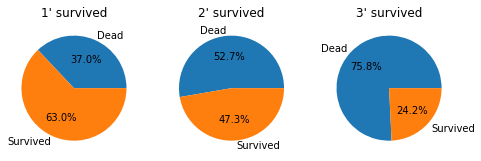

In [228]:
# PassengerId : index
# Survived : Dead / Alive
# Pclass :  1st = Upper, 2nd = Middle, 3rd = Lower
show_pie(train_set, 'Pclass')

# Upper class survived: 63.0%
# Middle class survived: 47.3%
# Lower class survived: 24.2%

In [229]:
# Name : Name of passenger => to Title
train_set['Title'] = train_set.Name.str.extract(' ([A-Za-z]+)\.')
train_set['Title']


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [230]:
train_set['Title'].unique()
train_set['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Sir           1
Jonkheer      1
Lady          1
Capt          1
Don           1
Ms            1
Countess      1
Name: Title, dtype: int64

In [231]:
train_set[train_set['Title']== 'Mme'][['Sex','Age']] # Mme : female / 24
train_set[train_set['Title']=='Mlle'][['Sex','Age']] # Mlle : female / 24
train_set[train_set['Title']=='Sir'][['Sex','Age']] # Sir : male / 49
train_set[train_set['Title']=='Jonkheer'][['Sex','Age']] # Jonkheer : male / 38
train_set[train_set['Title']=='Jonkheer'][['Sex','Age']]
train_set[train_set['Title']=='Lady'][['Sex','Age']] # Lady : female/48
train_set[train_set['Title']=='Capt'][['Sex','Age']] # Capt : male / 70
train_set[train_set['Title']=='Don'][['Sex','Age']] # Don : male / 40
train_set[train_set['Title']=='Ms'][['Sex','Age']] # female : female/28
train_set[train_set['Title']=='Countess'][['Sex','Age']] # Countess : female / 33
train_set[train_set['Title']== 'Major'][['Sex','Age']] # Major449 : male / 52   Major536 : male / 45
train_set[train_set['Title']== 'Col'][['Sex','Age']] # Col647 : male / 56   Col694 : male / 60

# Dr / Rev => others


,Sex,Age
647,male,56.0
694,male,60.0


In [232]:
train_set[train_set['Title']=='Mr']['Age'].mean() # 32.4
train_set[train_set['Title']=='Miss']['Age'].mean() # 21.8
train_set[train_set['Title']=='Mrs']['Age'].mean() # 35.9
train_set[train_set['Title']=='Master']['Age'].mean() # 4.6

train_set['Title'] = train_set['Title'].replace('Mme', 'Miss')
train_set['Title'] = train_set['Title'].replace('Mlle', 'Miss')
train_set['Title'] = train_set['Title'].replace('Sir', 'Mr')
train_set['Title'] = train_set['Title'].replace('Jonkheer', 'Mr')
train_set['Title'] = train_set['Title'].replace('Sir', 'Mr')
train_set['Title'] = train_set['Title'].replace('Lady', 'Mrs')
train_set['Title'] = train_set['Title'].replace('Capt', 'Mr')
train_set['Title'] = train_set['Title'].replace('Don', 'Mr')
train_set['Title'] = train_set['Title'].replace('Ms', 'Miss')
train_set['Title'] = train_set['Title'].replace('Countess', 'Mrs')
train_set['Title'] = train_set['Title'].replace('Major', 'Mr')
train_set['Title'] = train_set['Title'].replace('Col', 'Mr')

train_set['Title'] = train_set['Title'].replace(['Dr', 'Rev'], 'Others')


C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


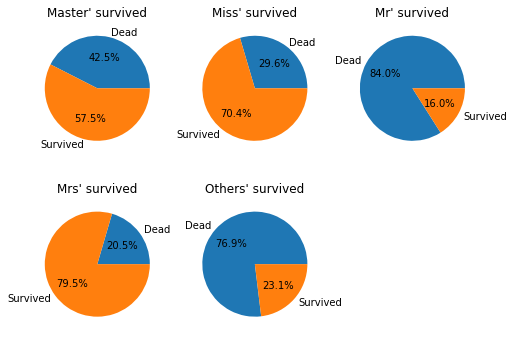

In [233]:
train_set.Title.value_counts()

show_pie(train_set, 'Title')

C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


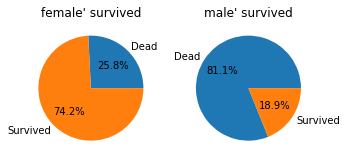

In [234]:
# Name : Name of passenger
# Sex : female, male
show_pie(train_set, 'Sex')

# female survived: 74.2
# male survived: 18.9

In [235]:
train_set.Age.isna().sum()

177

In [238]:
# Age : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# 호칭별 나이 평균
mean_age = train_set[['Title', 'Age']].groupby('Title').mean()


# 호칭과 호칭별 나이 평균값을 하나씩 가져온다 (ex :  index = Master, row = Age 4.574167)
# train_set.Title == Master 이고 train_set.Age가 null인 것의 index 들을 가져와서
# train_set.loc['65', 'Age'] = 4.574167
for index, row in mean_age.iterrows():
#     print('index: {}, row: {}'.format(index, row))
    nullIndex = train_set[(train_set.Title == index) & (train_set.Age.isna())].index
#     print('nullIndex: ', nullIndex)
#     print('row[0] : ', row[0])
    train_set.loc[nullIndex, 'Age'] = row[0]

    
train_set['AgeCategory'] = pd.qcut(train_set.Age, 8, labels=range(1, 9))
train_set.AgeCategory = train_set.AgeCategory.astype(int)


C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


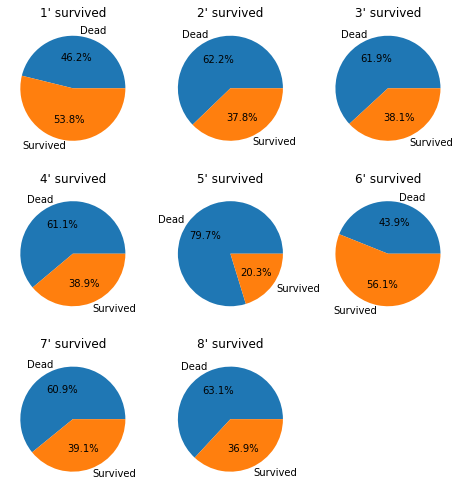

In [239]:
show_pie(train_set, 'AgeCategory')

In [39]:
# Name has noting to do with is he/she survived => drop the col

train_set.drop(['Name'], axis=1, inplace=True)

In [55]:
# Sex col need One-hot encoding
# female = 0, male = 1

train_set['Sex'] = train_set['Sex'].map({'female':0, 'male':1})
train_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C
